In [43]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [44]:
df_math = pd.read_csv('student-mat.csv')
df_port = pd.read_csv('student-por.csv')


In [45]:
df_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [46]:
df_port.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


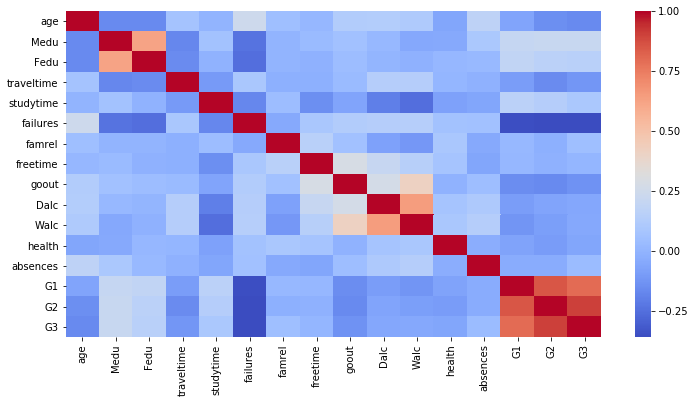

In [47]:
plt.figure(figsize = (12,6))
sns.heatmap(df_math.corr(), cmap = 'coolwarm')


In [49]:
cat_data = pd.get_dummies(df_port[['school', 'sex','address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']],drop_first=True)
#cat_data = cat_data.drop(['school_GP','sex_F', 'address_R','famsize_GT3', 'Pstatus_A', 'schoolsup_no', 'famsup_no','paid_no', 'activities_no', 'nursery_no', 'higher_no', 'internet_no', 'romantic_no'], axis = 1)
cat_data.head()

,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,0,0,1,0,0,1,0,0,0,1,1,0,0
1,0,0,1,0,1,0,1,0,0,0,1,1,0
2,0,0,1,1,1,1,0,0,0,1,1,1,0
3,0,0,1,0,1,0,1,0,1,1,1,1,1
4,0,0,1,0,1,0,1,0,0,1,1,0,0


In [50]:
nominal_cat = pd.get_dummies(df_port[['Mjob','Fjob','reason','guardian']])
nominal_cat = nominal_cat.drop(['Fjob_other','guardian_father'], axis = 1)
nominal_cat.head()

,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [51]:
numeric_data = df_port[['age','Medu','Fedu','traveltime','studytime','famrel','freetime','goout','Dalc','Walc','health','absences','failures']]
numeric_data.head()

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,absences,failures
0,18,4,4,2,2,4,3,4,1,1,3,4,0
1,17,1,1,1,2,5,3,3,1,1,3,2,0
2,15,1,1,1,2,4,3,2,2,3,3,6,0
3,15,4,2,1,3,3,2,2,1,1,5,0,0
4,16,3,3,1,2,4,3,2,1,2,5,0,0


In [74]:
grades = pd.DataFrame()
#pass = 1, fail = 0
def passfail(grade):
    if grade >=10:
        return 1
    if grade <10:
        return 0
grades['G1'] = df_port['G1'].apply(passfail)
grades['G2'] = df_port['G2'].apply(passfail)
grades['G3'] = df_port['G3'].apply(passfail)
grades.head()

,G1,G2,G3
0,0,1,1
1,0,1,1
2,1,1,1
3,1,1,1
4,1,1,1


In [54]:
df = pd.concat([grades, cat_data,numeric_data, nominal_cat], axis = 1)
df.head()

,G1,G2,G3,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,schoolsup_yes,famsup_yes,...,Fjob_at_home,Fjob_health,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,0,1,1,0,0,1,0,0,1,0,...,0,0,0,1,1,0,0,0,1,0
1,0,1,1,0,0,1,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
2,1,1,1,0,0,1,1,1,1,0,...,0,0,0,0,0,0,1,0,1,0
3,1,1,1,0,0,1,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0
4,1,1,1,0,0,1,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 44 columns):
G1                   649 non-null int64
G2                   649 non-null int64
G3                   649 non-null int64
school_MS            649 non-null uint8
sex_M                649 non-null uint8
address_U            649 non-null uint8
famsize_LE3          649 non-null uint8
Pstatus_T            649 non-null uint8
schoolsup_yes        649 non-null uint8
famsup_yes           649 non-null uint8
paid_yes             649 non-null uint8
activities_yes       649 non-null uint8
nursery_yes          649 non-null uint8
higher_yes           649 non-null uint8
internet_yes         649 non-null uint8
romantic_yes         649 non-null uint8
age                  649 non-null int64
Medu                 649 non-null int64
Fedu                 649 non-null int64
traveltime           649 non-null int64
studytime            649 non-null int64
famrel               649 non-null int64
freetime       

In [56]:
df.shape

(649, 44)

In [82]:
"""pca = PCA(n_components=10)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)"""

original shape:    (649, 41)
transformed shape: (649, 10)


In [57]:
X = df.drop(['G1','G2','G3'], axis = 1)
y = df['G1']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Decision Trees

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [99]:
dtree = DecisionTreeClassifier(max_depth=10)

In [100]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [101]:
predictions = dtree.predict(X_test)

In [102]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.48      0.63      0.55        49
          1       0.88      0.80      0.84       166

avg / total       0.79      0.76      0.77       215



In [103]:
print(confusion_matrix(y_test,predictions))

[[ 31  18]
 [ 33 133]]


In [104]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[3:])
features

['school_MS',
 'sex_M',
 'address_U',
 'famsize_LE3',
 'Pstatus_T',
 'schoolsup_yes',
 'famsup_yes',
 'paid_yes',
 'activities_yes',
 'nursery_yes',
 'higher_yes',
 'internet_yes',
 'romantic_yes',
 'age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'failures',
 'Mjob_at_home',
 'Mjob_health',
 'Mjob_other',
 'Mjob_services',
 'Mjob_teacher',
 'Fjob_at_home',
 'Fjob_health',
 'Fjob_services',
 'Fjob_teacher',
 'reason_course',
 'reason_home',
 'reason_other',
 'reason_reputation',
 'guardian_mother',
 'guardian_other']

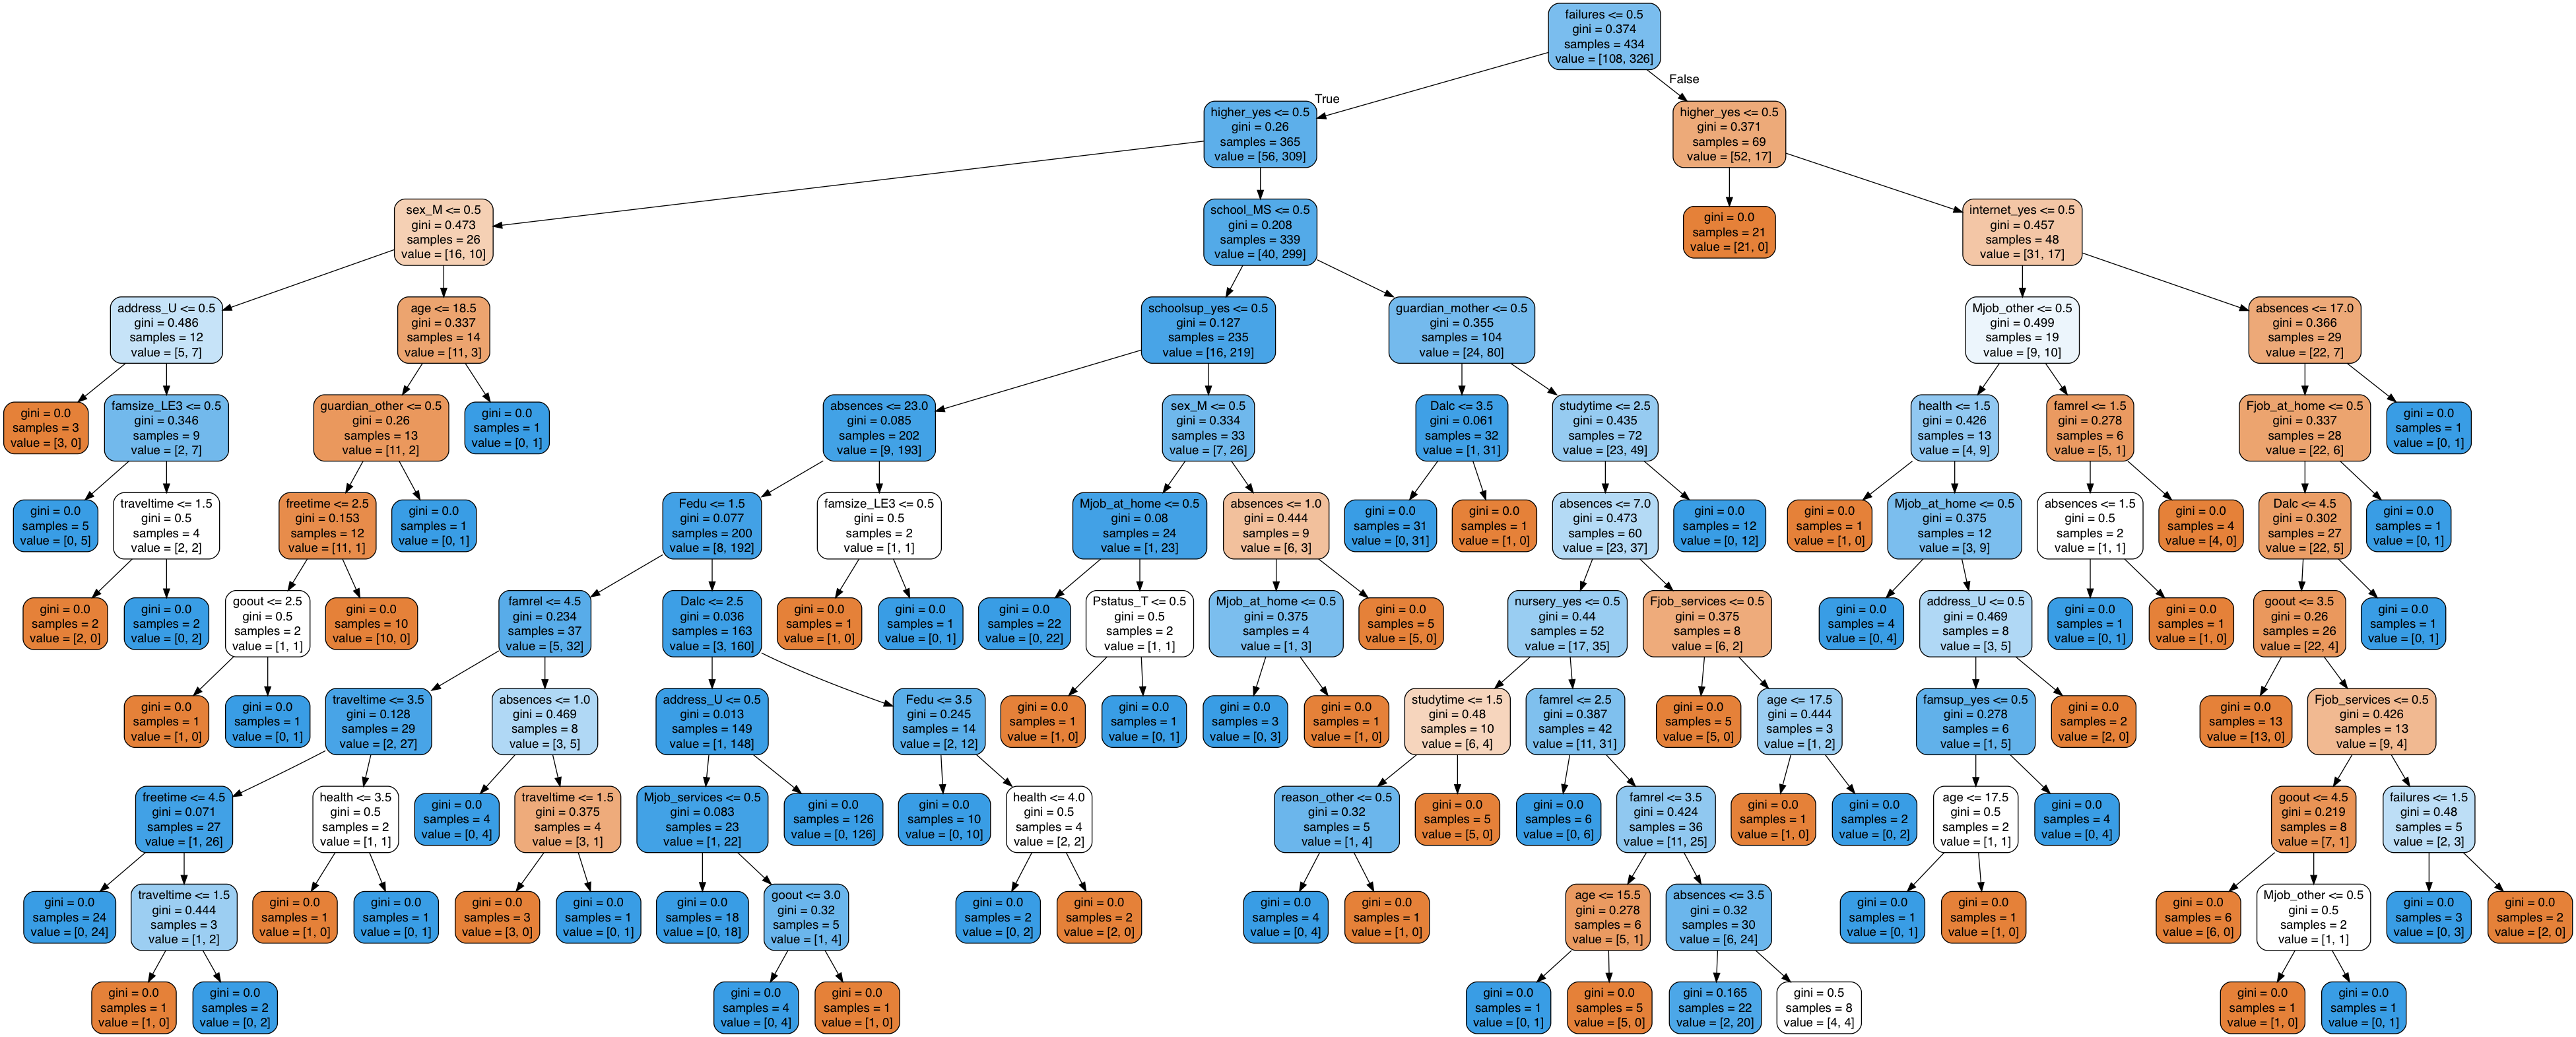

In [105]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

## Random Forest

In [106]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [107]:
rfc_pred = rfc.predict(X_test)

In [108]:
print(confusion_matrix(y_test,rfc_pred))

[[ 21  28]
 [  9 157]]


In [109]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

          0       0.70      0.43      0.53        49
          1       0.85      0.95      0.89       166

avg / total       0.81      0.83      0.81       215

